# Covid 19 Data Analysis

* Task 1: Project Introduction
* Task 2: Import and explore Covid 19 dataset
* Task 3: Finding a good Measure
* Task 4: Import and explore world happiness report dataset
* Task 5: Merge two datasets and find correlations among the data
* Task 6: Visualize your results using Seaborn


# Task 1: Project Introduction

### Task 1.1: Goal of the project: 

In this project, we will be looking for the **corrleation between the infection rate of COVID-19 from around the countries around the world, with the happiness of the country's citizen**. 

Correlation is measure of the strength of a linear relationship between two quantitative variables. 




First, we need to input the libraries for our analysis. 

### Task 1.2 Data Introduction

For the infection rate, we will be using **data of COVID infecton from the Global Convirmed Case by the John Hopkins University**, RAW_global_confirmed_cases.csv

For **the happiness of the countries, we will be using The World Happiness Report from the Gallup World Poll**, World_happiness_report.csv

### Task 1.3: Methods and Metrics

Now since this is a broad subject, we will need to create a limitation for our analysis. 

For the Infection Rate of COVID-19, we will be using metrics from the **Average of Infection per Day** and **Highest Infection Per Day**, from the start of the pandemic untill the last day. 

And for the Happiness Metrics, we will be using **Ladder Score**, which is the happiness score for a country. 

We would also create comparison from other metrics in the World Happiness Report with infection rate of COVID. 

# Task 2: Import and Explore Covid 19 dataset

Let's import the libraries/packages/modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We import 4 libraries for our analysis, pandas, numpy, matplotlib, and seaborn. 

**pandas** is a software library written for the Python programming language for data manipulation and analysis.

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices.

**matplotlib** and **seaborn**, is a visualization library to help us visualize the result of our analysis. 

### Task 2.1 importing covid 19 dataset and information exploration

After importing our libraries, now we will be importing our dataset. 

Let's import the dataset for COVID-19 Data from John Hopkins University. 


In [3]:
df = pd.read_csv('RAW_global_confirmed_cases.csv', delimiter=',')
df.head(1000)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21
0,Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878
1,Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935
2,Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723
3,Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571
4,Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,NaN,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590,1266288,1280780,1294778,1309092,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648,1459175,1493237,1508473,1524368,1540478,1555455,1571780,1588335,1604712
276,West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799,461157,461467,461467,461467,462219,462621,462958,463277,463573,463573,463573,464341,464751,465094,465094,465094,465094,465094,466669,467058,467391,467682
277,Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025,10034,10043,10047,10047,10056,10063,10069,1

In [10]:
# np.nan
# 'NaN' - String - text
# 'null' - String - text

# Text information
# Python data structure: String
# Pandas data type: Object

In [13]:
pd.isnull(np.nan)

True

In [14]:
pd.isnull('NaN')

False

In [15]:
pd.isnull('null')

False

In [23]:
pd.to_numeric('NaN', errors='coerce')

nan

The dataset consist of Country/Region, Priovince/State, Latitude & Longitude of the countries, and the number of cases of COVID-19 from January 22th of 2020 untill September 8th of 2021 from each countries.

Let's check the shape of the dataset

In [5]:
df.shape

(280, 706)

Let's check the content of the dataset

In [6]:
df.info

<bound method DataFrame.info of          Country/Region Province/State        Lat  ...  12/21/21  12/22/21  12/23/21
0           Afghanistan            NaN  33.939110  ...    157816    157841    157878
1               Albania            NaN  41.153300  ...    206273    206616    206935
2               Algeria            NaN  28.033900  ...    215145    215430    215723
3               Andorra            NaN  42.506300  ...     21062     21372     21571
4                Angola            NaN -11.202700  ...     66566     67199     68362
..                  ...            ...        ...  ...       ...       ...       ...
275             Vietnam            NaN  14.058324  ...   1571780   1588335   1604712
276  West Bank and Gaza            NaN  31.952200  ...    467058    467391    467682
277               Yemen            NaN  15.552727  ...     10103     10103     10105
278              Zambia            NaN -13.133897  ...    219023    221880    225260
279            Zimbabwe          

Let's check the data types of the dataset

In [8]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)

In [9]:
## Data Types

# float
# integer
# object - non-numerical
# boolean - True/False

df.dtypes

Country/Region     object
Province/State     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
12/19/21            int64
12/20/21            int64
12/21/21            int64
12/22/21            int64
12/23/21            int64
Length: 706, dtype: object

### Task 2.2: Delete the useless columns

The latitude and longitude does not contribute to our analysis, which is why we will be dropping the column.

In [11]:
# method 1
df = df.drop(['Lat', 'Long'], axis=1)
# method 2
# df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [12]:
df.head()

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,...,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157260,157289,157359,157387,157412,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878
1,Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935
2,Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723
3,Andorra,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571
4,Angola,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362


### Task 2.3: Rename columns

Let's rename the Country/Region to Country and Province/State to Province

In [24]:
df.rename(
    columns = {
        'Country/Region': 'Country',
        'Province/State': 'Province'
    },
    inplace=True
)
df.head(20)

# () -- python function
# [] -- list
# {} -- dict, data structure, {key: value}

,Country,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,...,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157260,157289,157359,157387,157412,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878
1,Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935
2,Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723
3,Andorra,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571
4,Angola,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362
5,Antigua and Barbuda,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4141,4141,4141,4141,4146,4147,4147,4148,4148,4151,4151,4159,4159,4162,4162,4177,4177,4178,4186,4198,4198,4198,4201,4205,4216
6,Argentina,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5328416,5330748,5332629,5335310,5337692,5339382,5340676,5343153,5346242,5348123,5350867,5354440,5356885,5358455,5358455,5366522,5371341,5376642,5382290,5386453,5389707,5395044,5404380,5415501,5428957
7,Armenia,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,338120,338518,339020,339578,339977,340396,340723,340818,341058,341468,341768,342115,342405,342538,342604,342765,342977,343157,343350,343506,343636,343708,343845,343997,344126
8,Australia,Australian Capital Territory,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2130,2134,2142,2146,2153,2159,2165,2167,2175,2179,2179,2196,2197,2200,2204,2210,2222,2242,2260,2278,2291,2307,2365,2450,2552
9,Australia,New South Wales,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,81674,81916,82180,82514,82837,83118,83321,83572,83967,84384,84895,85447,85924,86453,87248,88595,90333,92532,95000,97558,100040,103073,106810,112496,118074


### Task 2.4: Aggregating the dataset by the country

Let's do a groupby by the country and sort the counting result in descending order

In [ ]:
# Pandas dataframe

In [ ]:
# Numpy array
# Numpy list

In [25]:
df.groupby('Country').count().sort_values('1/22/20', ascending=False)

,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,...,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Canada,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
United Kingdom,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
France,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Australia,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guinea,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Guinea-Bissau,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Guyana,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


From the groupby result, we can see that some countries are split between their provinces.

Let's merge the provinces to get the total infection of each countries per day.

In [26]:
df_agg = df.groupby('Country').sum()
df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157260,157289,157359,157387,157412,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362


Let's see the shape of the aggregated dataset

In [27]:
df_agg.shape

(196, 702)

After manipulating our data, we now have dropped the column Lat and Long, and also we have group our data so that the infection of each countries are totaled.

After aggregating the infection rates from each country, we now have a data from 196 countries, and their dialy infection cases. 

To better understand about the infection rate, we will be visualizing infection rate from 5 sample countries, which has the highest infection rate per day. 

### Task 2.5: Visualizing data related to a country (for example China, Canada, United Kingdom, France and Australia)

visualization always helps for better understanding of our data.

Let's try to select the data from one country (for example China)

In [28]:
df_agg.loc['China']

1/22/20        548
1/23/20        643
1/24/20        920
1/25/20       1406
1/26/20       2075
             ...  
12/19/21    112989
12/20/21    113077
12/21/21    113163
12/22/21    113269
12/23/21    113358
Name: China, Length: 702, dtype: int64

Let's try to plot the data from one country (for example China)

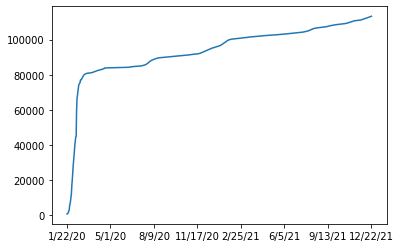

In [29]:
df_agg.loc['China'].plot()

Let's try to plot the selected 5 countries' data in one graph, giving the legend and title

Text(0.5, 1.0, 'Infection cases of Covid-19')

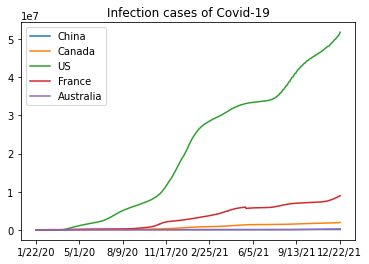

In [30]:
df_agg.loc['China'].plot()
df_agg.loc['Canada'].plot()
df_agg.loc['US'].plot()
df_agg.loc['France'].plot()
df_agg.loc['Australia'].plot()

plt.legend()
plt.title('Infection cases of Covid-19')

From the visualization above, we can see how the number of recorded COVID-19 cases climbed up. 

But for our analysis, we will need to process the data, since we want to know how much is the highest climb active cases dialy from each countries, and the average increase of active cases dialy. We will make two new calculations. 

# Task 3: Calculating a good measure
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 



Let's plot the all time data of China 

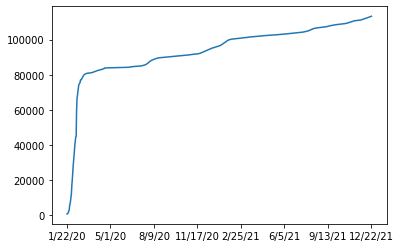

In [31]:
df_agg.loc['China'].plot()

Let's plot the first 5 days' data of China

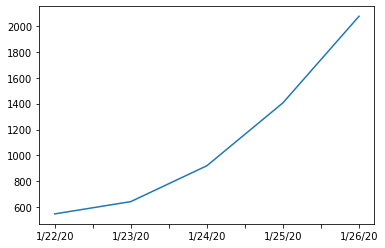

In [32]:
df_agg.loc['China'][0:5].plot()

### task 3.1: calculating and plotting the first derivative of the curve

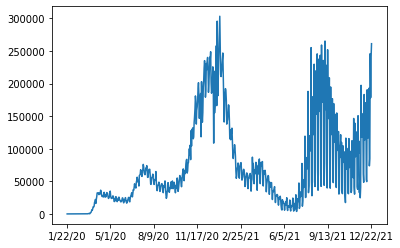

In [33]:
# (df[n+1] - df[n])
df_agg.loc['US'].diff().plot()

### task 3.2: find maxmimum and mean infection change for China, Canada and US

In [34]:
print('China max change:', df_agg.loc['China'].diff().max())
print('China mean change:', df_agg.loc['China'].diff().mean())

China max change: 15136.0
China mean change: 160.92724679029956


In [35]:
print('US max change:', df_agg.loc['US'].diff().max())
print('US mean change:', df_agg.loc['US'].diff().mean())

US max change: 303461.0
US mean change: 73915.56490727531


In [36]:
print('Canada max change:', df_agg.loc['Canada'].diff().max())
print('Canada mean change:', df_agg.loc['Canada'].diff().mean())

Canada max change: 21929.0
Canada mean change: 2788.756062767475


In [38]:
df_agg.loc['Canada'].diff().max()

21929.0

Above, we use US as a sample country. We diff() to find the changes of cases from each day, use max() to find the highest dialy change of infection, and mean() to find the average dialy changes of infection.

Now that we have the calculation for our analysis, we need to apply them for every countries in the list. 

### Task 3.3: find maximum infection rate for all of the countries

In [41]:
countries[0:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria']

In [40]:
countries = list(df_agg.index)
max_infection_rates = []
for country in countries:
  max_infection_rates.append(df_agg.loc[country].diff().max())

avg_infection_rates = []
for country in countries:
  avg_infection_rates.append(df_agg.loc[country].diff().mean())

In [42]:
df_agg.diff(axis = 1).max(axis = 1)

Country
Afghanistan            3243.0
Albania                1239.0
Algeria                1927.0
Andorra                 696.0
Angola                 1493.0
                       ...   
Vietnam               39132.0
West Bank and Gaza    30356.0
Yemen                   174.0
Zambia                 3594.0
Zimbabwe               9185.0
Length: 196, dtype: float64

In [43]:
df_agg.diff(axis = 1).mean(axis = 1)

Country
Afghanistan            225.218260
Albania                295.199715
Algeria                307.736091
Andorra                 30.771755
Angola                  97.520685
                         ...     
Vietnam               2289.175464
West Bank and Gaza     667.164051
Yemen                   14.415121
Zambia                 321.340942
Zimbabwe               287.223966
Length: 196, dtype: float64

### Task 3.4: add the columns to previous dataframe

Now, we have the max and average infection from each countries

Let's add these two columns back to the original dataset.


In [44]:
df_agg['max_infection_rates'] = max_infection_rates
df_agg['avg_infection_rates'] = avg_infection_rates

In [45]:
df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,max_infection_rates,avg_infection_rates
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157359,157387,157412,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,3243.0,225.218260
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,1239.0,295.199715
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,1927.0,307.736091
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,696.0,30.771755
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,1493.0,97.520685


### Task 3.5: create a new dataframe with only needed columns

Let's create a new dataset with only country, max_infection_rates, and avg_infection_rates.

In [46]:
selected_col = ['max_infection_rates', 'avg_infection_rates']
df_new = df_agg[selected_col]

In [47]:
df_new.head()

,max_infection_rates,avg_infection_rates
Country,,
Afghanistan,3243.0,225.218260
Albania,1239.0,295.199715
Algeria,1927.0,307.736091
Andorra,696.0,30.771755
Angola,1493.0,97.520685


# Task 4: Import and Explore World Happiness Report Data
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

Now that we have the data for our Infection Rate, we need the data for our countries Happiness. 

First, we load the dataset using pandas. 

## Task 4.1: import the dataset

Let's import the World_happiness_report.csv data.

In [49]:
df_happy = pd.read_csv('World_happiness_report_new.csv')
df_happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [50]:
df_happy.shape

(156, 9)

After seeing the dataset, we notice that there are several data that we do not need, such as regional indicator, standard error of ladder score, and etc. 

Therefore, our first step is to remove the unnecessary column. 

To do that, we first list the name of the unnecessary column for our analysis, and put them inside a variable. Then all we have to do is use the drop() function to remove all the column that we have listed before. 

## Task 4.2: Drop useless columns

let's list the name of unnecessary columns, and drop the list.

In [51]:
df_happy.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [53]:
drop_cols = ['Overall rank', 'Generosity', 'Perceptions of corruption']
df_happy[drop_cols]

,Overall rank,Generosity,Perceptions of corruption
0,1,0.153,0.393
1,2,0.252,0.410
2,3,0.271,0.341
3,4,0.354,0.118
4,5,0.322,0.298
...,...,...,...
151,152,0.217,0.411
152,153,0.276,0.147
153,154,0.158,0.025
154,155,0.235,0.035


In [54]:
drop_cols = ['Overall rank', 'Generosity', 'Perceptions of corruption']
df_happy.drop(drop_cols, axis=1, inplace=True)
# python dict {}
# df[['Ovverall', 'country']]

In [55]:
df_happy.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


Now that the dataset only consist of important data to us, we need to merge the happiness dataset, with the previous dataset that we made about infection rate. To do that, we need to change something first in our happiness dataset. 

In our happiness dataset, the index of the dataset is still ordinal numbers. To allow us to join the two dataset, we need to change the index into countries first. 

## Task 4.3: changing the index of the dataframe

Let's change the index of the dataframe from number to 'Country name'

In [59]:
df_happy.set_index('Country or region', inplace=True)

KeyError: ignored

In [60]:
df_happy.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


# Task 5: Join two tables together

now let's join two the covid19 table with world happiness report table we have prepared.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

3 Ways of Python Table Join:

1.   concatenation
2.   merge
3.   join

Show the shape of covid 19 dataset

In [61]:
df_new.head()

,max_infection_rates,avg_infection_rates
Country,,
Afghanistan,3243.0,225.218260
Albania,1239.0,295.199715
Algeria,1927.0,307.736091
Andorra,696.0,30.771755
Angola,1493.0,97.520685


In [62]:
df_new.shape

(196, 2)

Show the shape of world happiness report dataset

In [63]:
df_happy.shape

(156, 5)

See that the happiness_report_csv, have less row than corona_data. This mean that not all of the countries in corona_data is listed in happiness_report_csv. 

Since we only need the list of countries that is in both of the dataset, we join them using **inner join**.

## Task 5.1 Merge two datasets and find correlations among the data

Let's join the two tables together

In [68]:
df_join = df_happy.join(df_new, how="inner")
df_join.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rates,avg_infection_rates
Finland,7.769,1.340,1.587,0.986,0.596,5932.0,324.064194
Denmark,7.600,1.383,1.573,0.996,0.592,13114.0,923.967190
Norway,7.554,1.488,1.582,1.028,0.603,10867.0,524.773181
Iceland,7.494,1.380,1.624,1.026,0.591,658.0,31.507846
Netherlands,7.488,1.396,1.522,0.999,0.557,23783.0,4381.731812


In [69]:
df_join.shape

(144, 7)

In [70]:
df_join2 = pd.merge(df_happy, df_new, left_index=True, right_index=True, how="inner")
df_join2.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rates,avg_infection_rates
Finland,7.769,1.340,1.587,0.986,0.596,5932.0,324.064194
Denmark,7.600,1.383,1.573,0.996,0.592,13114.0,923.967190
Norway,7.554,1.488,1.582,1.028,0.603,10867.0,524.773181
Iceland,7.494,1.380,1.624,1.026,0.591,658.0,31.507846
Netherlands,7.488,1.396,1.522,0.999,0.557,23783.0,4381.731812


In [71]:
df_join2.shape

(144, 7)

In [72]:
df_join3 = pd.concat([df_happy, df_new], axis=1, join="inner")
df_join3.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rates,avg_infection_rates
Finland,7.769,1.340,1.587,0.986,0.596,5932.0,324.064194
Denmark,7.600,1.383,1.573,0.996,0.592,13114.0,923.967190
Norway,7.554,1.488,1.582,1.028,0.603,10867.0,524.773181
Iceland,7.494,1.380,1.624,1.026,0.591,658.0,31.507846
Netherlands,7.488,1.396,1.522,0.999,0.557,23783.0,4381.731812


In [73]:
df_join3.shape

(144, 7)

## Task 5.2 Correlation Matrix

Since our analysis focused on the correlation between the infection rates and happiness score, we created a correlation matrix between each variable. 

Closer to 1 mean that there is a positive correlation, closer to 0 mean there is no corrlelation, and closer to -1 mean that there is a negative correlation.



In [75]:
corr = df_join.corr()
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rates,avg_infection_rates
Score,1.000000,0.795413,0.784094,0.801891,0.585119,0.044095,0.097645
GDP per capita,0.795413,1.000000,0.757521,0.859431,0.394799,0.134994,0.171220
Social support,0.784094,0.757521,1.000000,0.751632,0.456317,0.073329,0.089417
Healthy life expectancy,0.801891,0.859431,0.751632,1.000000,0.423146,0.099119,0.145320
Freedom to make life choices,0.585119,0.394799,0.456317,0.423146,1.000000,-0.035189,0.061928
max_infection_rates,0.044095,0.134994,0.073329,0.099119,-0.035189,1.000000,0.618941
avg_infection_rates,0.097645,0.171220,0.089417,0.145320,0.061928,0.618941,1.000000


# Task 6. Data Visualization

## Task 6.1 Use heatmap to visualize the correlation matrix

https://seaborn.pydata.org/generated/seaborn.heatmap.html

*   heatmap

Let's plot heatmap of corr matrix

[Text(0.5, 0, 'Score'),
 Text(1.5, 0, 'GDP per capita'),
 Text(2.5, 0, 'Social support'),
 Text(3.5, 0, 'Healthy life expectancy'),
 Text(4.5, 0, 'Freedom to make life choices'),
 Text(5.5, 0, 'max_infection_rates'),
 Text(6.5, 0, 'avg_infection_rates')]

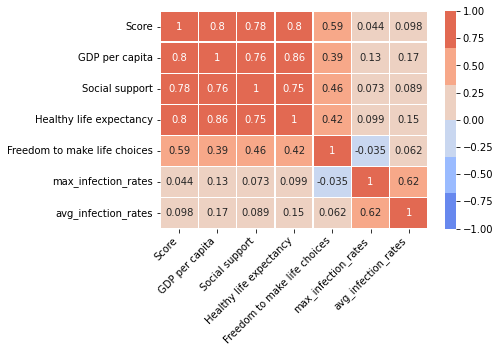

In [85]:
colormap = sns.color_palette("coolwarm")

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1,center=0,
    annot=True,
    linewidths=0.5,
    cmap=colormap
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## 6.2 Use scatter plot to visualize GDP and max infection rate

Let's plot distribtuion of GDP

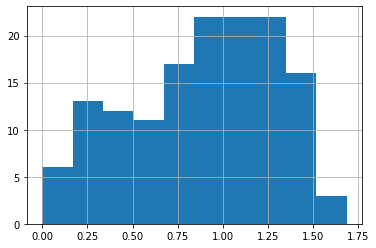

In [87]:
df_join['GDP per capita'].hist()

Let's plot distribution of max infection rate

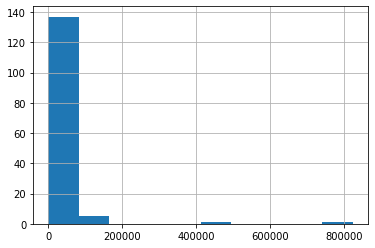

In [93]:
df_join['max_infection_rates'].hist()

Let's plot scatter GDP and max infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


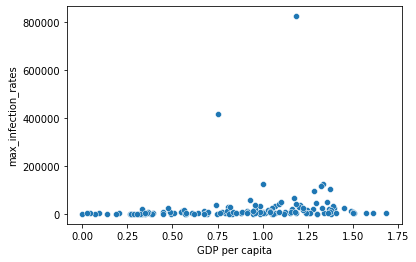

In [91]:
sns.scatterplot(df_join['GDP per capita'], df_join['max_infection_rates'])

## Task 6.3 Take log to max infection rate

Why taking log?

Let's plot the distribution of logged max infection rate

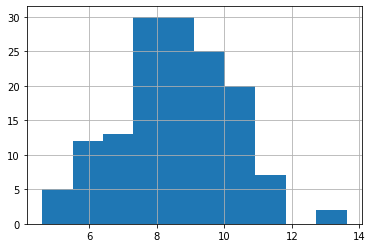

In [94]:
np.log(df_join['max_infection_rates']).hist()

Let's plot scatter plot of logged GDP and logged max infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


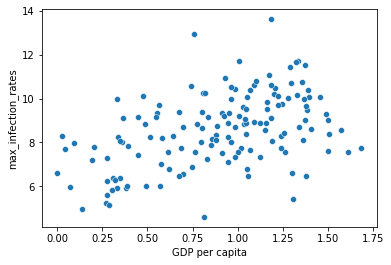

In [95]:
sns.scatterplot(df_join['GDP per capita'], np.log(df_join['max_infection_rates']))

Let's plot regression plot of logged GDP and logged max infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


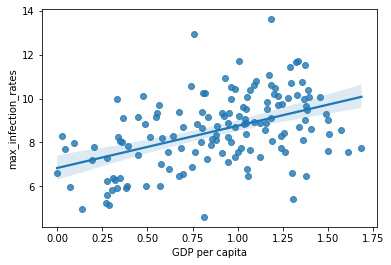

In [96]:
sns.regplot(df_join['GDP per capita'], np.log(df_join['max_infection_rates']))

## Task 6.4 Plot social support & maximum Infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


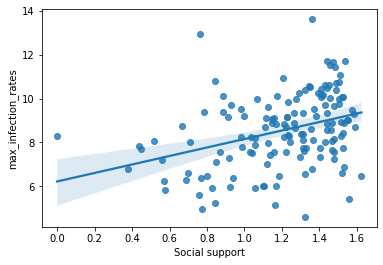

In [97]:
sns.regplot(df_join['Social support'], np.log(df_join['max_infection_rates']))

## Task 6.5 Plot Healthy life expectancy vs maximum Infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


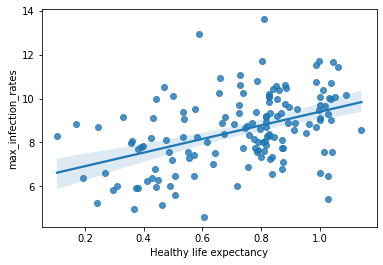

In [98]:
sns.regplot(df_join['Healthy life expectancy'], np.log(df_join['max_infection_rates']))

## Task 6.6 Plot Freedom to make life choices vs maximum Infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


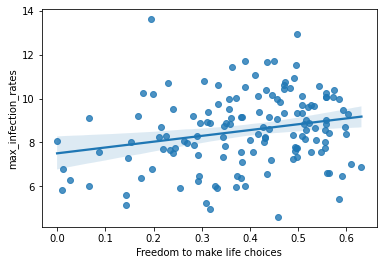

In [99]:
sns.regplot(df_join['Freedom to make life choices'], np.log(df_join['max_infection_rates']))

In [100]:
# y = ax + b

## Task 6.7 Plot Ladder Score vs Avg and Max infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Correlation between Infection Rates and Happiness Score')

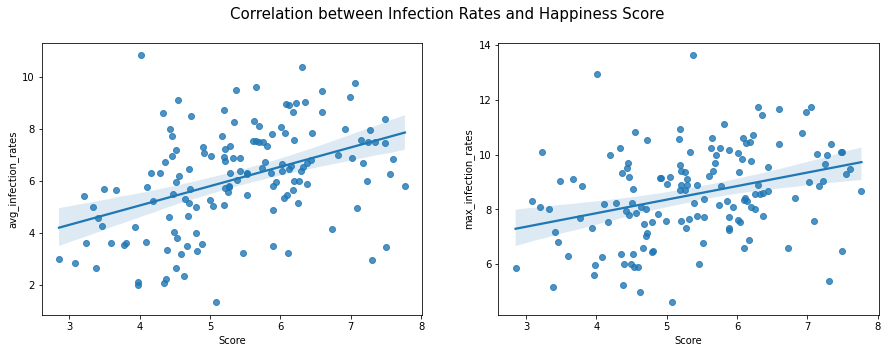

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.regplot(df_join['Score'], np.log(df_join['avg_infection_rates']), ax=axs[0])
sns.regplot(df_join['Score'], np.log(df_join['max_infection_rates']), ax=axs[1])
fig.suptitle('Correlation between Infection Rates and Happiness Score', fontsize=15)

In our analysis, we compare 

*   maximum infection rate daily
*   average infection rate daily

with the 5 metrics of happines from countries around the globe


1.   Ladder Score
2.   GDP per capita
3.   Social support
4.   Healthy life expectancy
5.   Freedom to make life choices



From our visualization, we can see that there is a **positive correlation** between the infection rates, and the happines from each countries. 

To put it simply, a more happy and stable country, appear to have a higher infection rates than others. Of course there is many factors and variable that could effect this, and this is just a simple metrics that visualize the factors of infection rates from each countries. 

Therefore, based on the data that we have, **a happier country have a higher infection rate than less happier countries**. 

In [107]:
df_join

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rates,avg_infection_rates
Finland,7.769,1.340,1.587,0.986,0.596,5932.0,324.064194
Denmark,7.600,1.383,1.573,0.996,0.592,13114.0,923.967190
Norway,7.554,1.488,1.582,1.028,0.603,10867.0,524.773181
Iceland,7.494,1.380,1.624,1.026,0.591,658.0,31.507846
Netherlands,7.488,1.396,1.522,0.999,0.557,23783.0,4381.731812
...,...,...,...,...,...,...,...
Rwanda,3.334,0.359,0.711,0.614,0.555,3072.0,147.175464
Tanzania,3.231,0.476,0.885,0.499,0.417,24479.0,37.778887
Afghanistan,3.203,0.350,0.517,0.361,0.000,3243.0,225.218260
Central African Republic,3.083,0.026,0.000,0.105,0.225,4044.0,17.062767
